In [1]:
import backend
import matplotlib.pyplot as plt
import numpy as np


# Colormaps in sets of three 
This notebook generates colormaps that are in sets of three

The colormaps are generated from the ‘CAM02-LCD’ colorspace as defined in the package colorspacious (https://pypi.org/project/colorspacious/)

https://github.com/trygvrad/colorstamps/ is used for easy access to this colorspace and visualization

In practice, we are are looking for three vectors at 120° angles in the following colorspace:

In [2]:
N2 = 37
N = 19
colorbar_dict = {}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


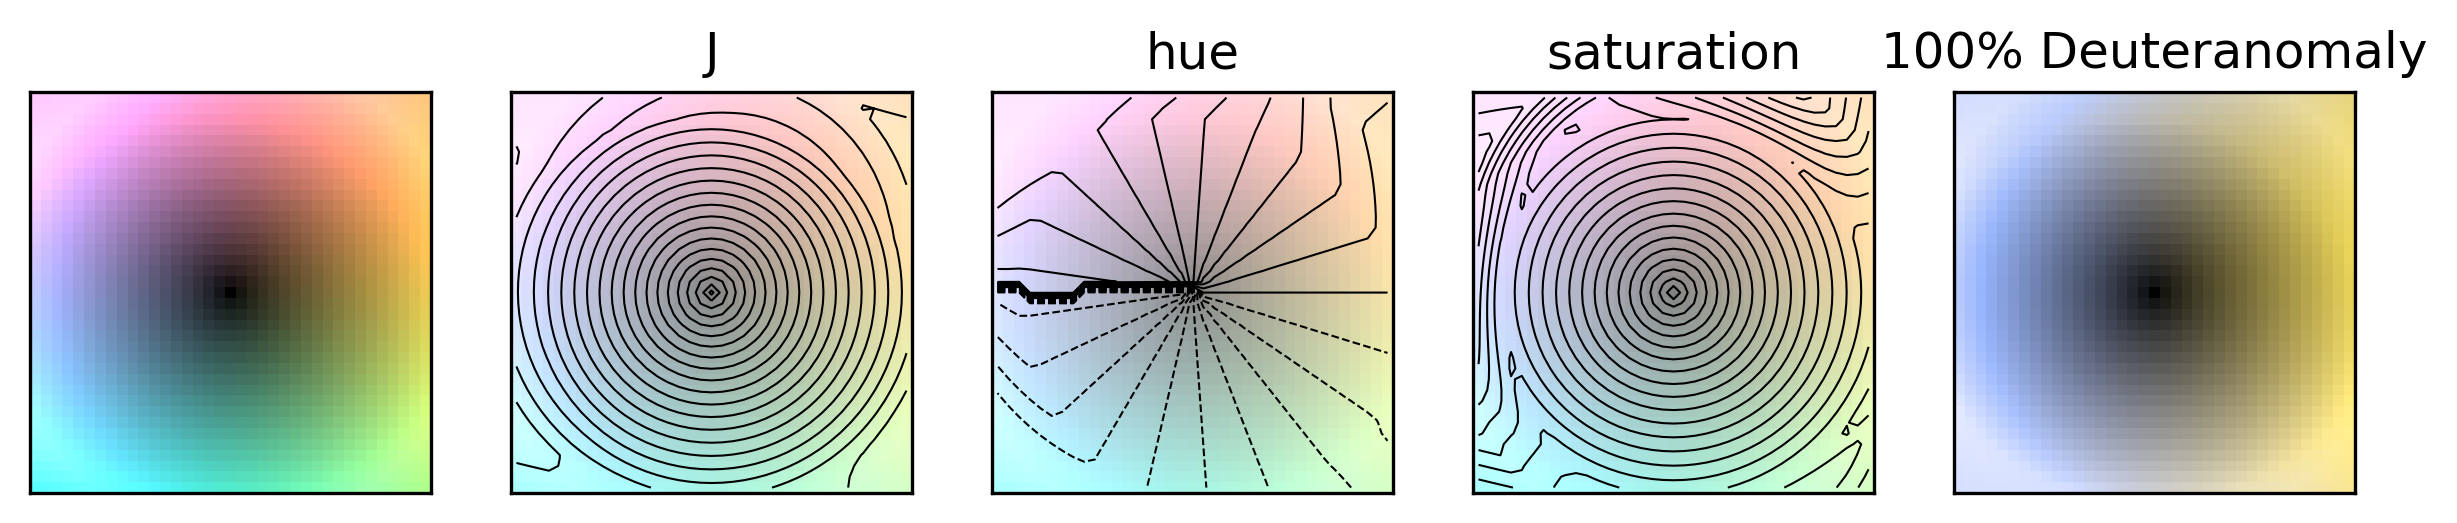

In [3]:
cmap = backend.get_var_J(l = N2, J = (110,4), gamma = 0.8, sat_gamma = 0.8)
import colorstamps
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 300, facecolor = 'w')
backend.eval(cmap + 1e-5, axes) # include a delta (+1e-5) to avoid error

We need to find three vectors at 120° each in this colorspace 

Once we have selected three vectors, we need to make sure they form a greyscale (r=g=b) when they are combinde linearly

Since the vectors are defined at 120° in ‘CAM02-LCD’ colorspace this is not guaranteed when they are added together in RGB colorspace, and we apply a correction for this

We also need to adjust the colormaps so that they start at (0,0,0) and end at (1,1,1) when combined

We then extract the final colormaps from the 3D matrix

# Colorbars 3VarAddA

/home/trygvrad/.local/lib/python3.11/site-packages/colorspacious/ciecam02.py:333: RuntimeWarning: invalid value encountered in divide
  t = (C
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max before adjustment: [0.9134966  1.04487108 1.01274071]
values <0: 0
values >1: 80


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


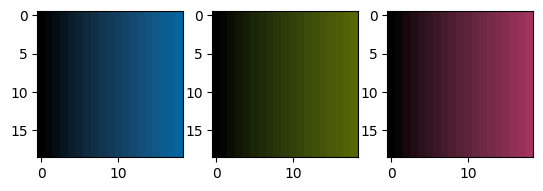

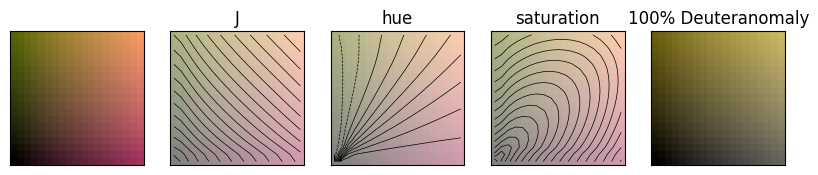

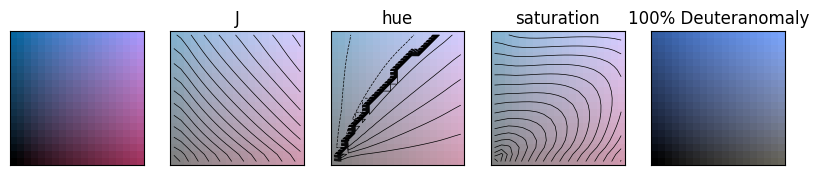

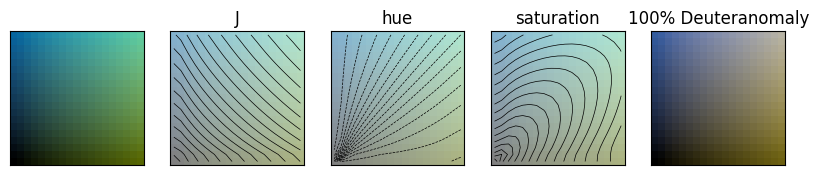

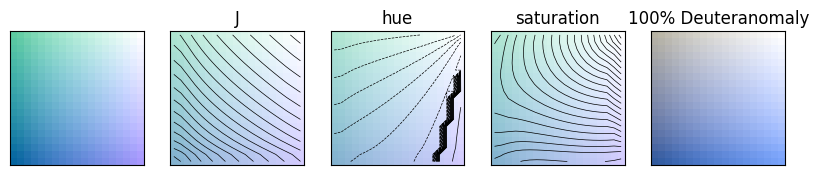

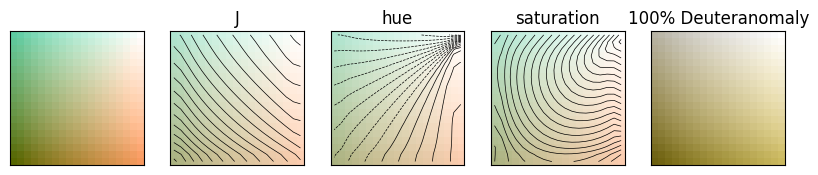

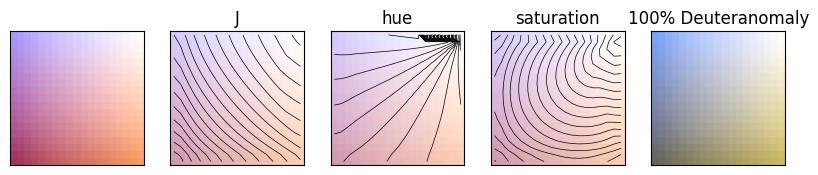

In [4]:
r = 30-180 #90/3 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (0, 55.7) # range in lightness 
radius = 33
gamma = 0.8
sat_gamma = 0.65

cmap_0 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r, r = radius, gamma = gamma, sat_gamma = sat_gamma)
cmap_1 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+120, r = radius, gamma = gamma, sat_gamma = sat_gamma )
cmap_2 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+240, r = radius, gamma = gamma, sat_gamma = sat_gamma )


print(f'max before adjustment: {cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3



# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
end_c = cmap_0[-1] + cmap_1[-1] + cmap_2[-1]
cmap_0 = cmap_0/end_c[np.newaxis, :]
cmap_1 = cmap_1/end_c[np.newaxis, :]
cmap_2 = cmap_2/end_c[np.newaxis, :]

# ensure origin is rgb = (0,0,0)
cmap_0_b = cmap_0 - cmap_0[0,:] # copy with black 0,0,0
cmap_1_b = cmap_1 - cmap_1[0,:] # copy with black 0,0,0
cmap_2_b = cmap_2 - cmap_2[0,:] # copy with black 0,0,0
# non-linear mixing so that darker colors become more distinct
ls = np.linspace(0,1,N)[:, np.newaxis]**0.3*np.ones((N,3))
# scorrectly scaled black and white
cmap_0 = cmap_0_b * (1-ls) + cmap_0 * (ls)
cmap_1 = cmap_1_b * (1-ls) + cmap_1 * (ls)
cmap_2 = cmap_2_b * (1-ls) + cmap_2 * (ls)

# combine to a 3d color matrix
cmap = cmap_0[:,np.newaxis,np.newaxis] + cmap_1[np.newaxis,:,np.newaxis] + cmap_2[np.newaxis,np.newaxis,:]

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[N-1,N-1]*N-1, cmap[0,0]*N-1)


# select cbars
colorbar_dict['3VarAddA0'] = cmap[:,0,0]
colorbar_dict['3VarAddA1'] = cmap[0,:,0]
colorbar_dict['3VarAddA2'] = cmap[0,0,:]

# evaluate
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0*np.ones((N,N,3)))
axes[1].imshow(cmap_1*np.ones((N,N,3)))
axes[2].imshow(cmap_2*np.ones((N,N,3)))

fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[0,:,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,0,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,:,0] + 1e-5, axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[-1,:,:] + 1e-5,axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,-1,:] + 1e-5,axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,:,-1] + 1e-5,axes) # include a delta (+1e-5) to avoid error

In [5]:
cmap[0,0,0]
colorbar_dict['3VarAddA0'][0]

array([0., 0., 0.])

In [6]:
colorbar_dict['3VarAddA0'][-1]+ colorbar_dict['3VarAddA1'][-1]+colorbar_dict['3VarAddA2'][-1]

array([1., 1., 1.])

# Colorbars 3VarAddB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

max before adjustment: [1.05942114 1.01828001 1.06812188]
values <0: 20
values >1: 41


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

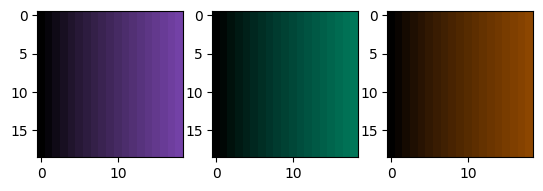

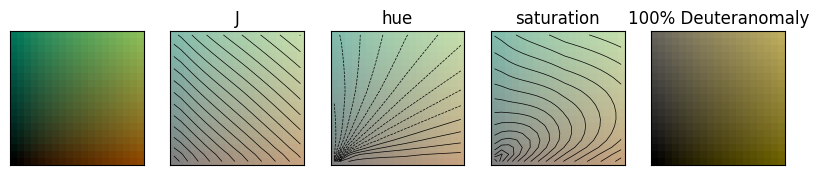

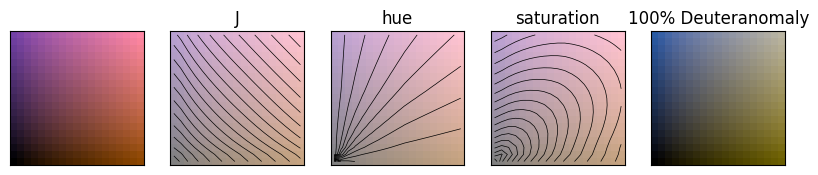

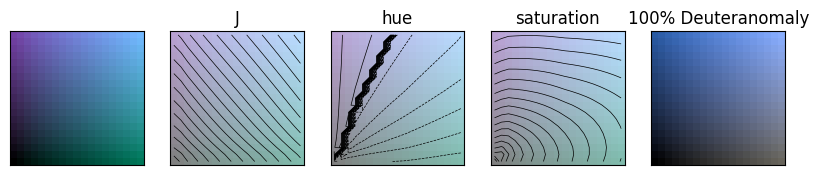

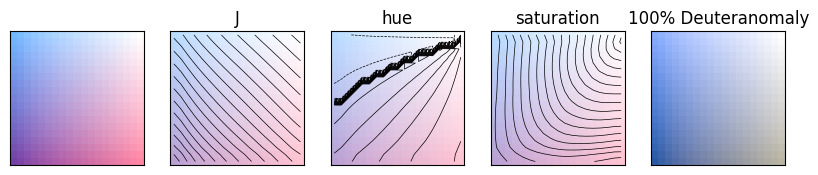

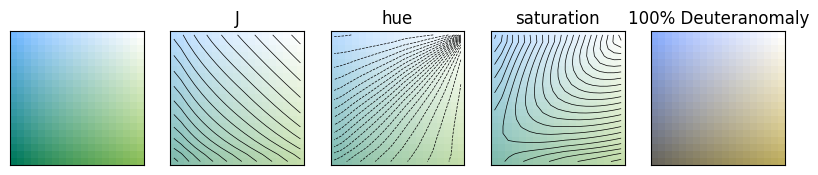

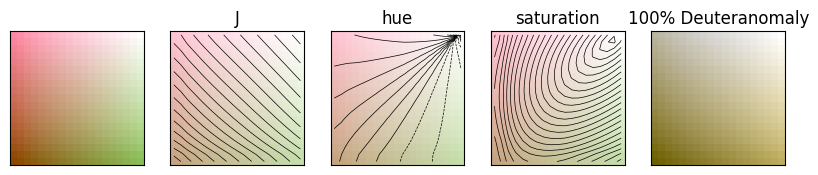

In [7]:
r = -30+180 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (1, 55.7) # range in lightness 
radius = 37
gamma = 0.8
sat_gamma = 0.65

cmap_0 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r, r = radius, gamma = gamma, sat_gamma = sat_gamma )
cmap_1 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+120, r = radius, gamma = gamma, sat_gamma = sat_gamma )
cmap_2 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+240, r = radius, gamma = gamma, sat_gamma = sat_gamma )

print(f'max before adjustment: {cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3



# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
end_c = cmap_0[-1] + cmap_1[-1] + cmap_2[-1]
cmap_0 = cmap_0/end_c[np.newaxis, :]
cmap_1 = cmap_1/end_c[np.newaxis, :]
cmap_2 = cmap_2/end_c[np.newaxis, :]

# ensure origin is rgb = (0,0,0)
cmap_0_b = cmap_0 - cmap_0[0,:] # copy with black 0,0,0
cmap_1_b = cmap_1 - cmap_1[0,:] # copy with black 0,0,0
cmap_2_b = cmap_2 - cmap_2[0,:] # copy with black 0,0,0
# non-linear mixing so that darker colors become more distinct
ls = np.linspace(0,1,N)[:, np.newaxis] ** 1 *np.ones((N,3))
# scorrectly scaled black and white
cmap_0 = cmap_0_b * (1-ls) + cmap_0 * (ls)
cmap_1 = cmap_1_b * (1-ls) + cmap_1 * (ls)
cmap_2 = cmap_2_b * (1-ls) + cmap_2 * (ls)

# combine to a 3d color matrix
cmap = cmap_0[:,np.newaxis,np.newaxis] + cmap_1[np.newaxis,:,np.newaxis] + cmap_2[np.newaxis,np.newaxis,:]

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[N-1,N-1]*N-1, cmap[0,0]*N-1)


# select cbars
colorbar_dict['3VarAddB0'] = cmap[:,0,0]
colorbar_dict['3VarAddB1'] = cmap[0,:,0]
colorbar_dict['3VarAddB2'] = cmap[0,0,:]
# evaluate
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0*np.ones((N,N,3)))
axes[1].imshow(cmap_1*np.ones((N,N,3)))
axes[2].imshow(cmap_2*np.ones((N,N,3)))

fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[0,:,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,0,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,:,0] + 1e-5, axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[-1,:,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,-1,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,:,-1] + 1e-5, axes) # include a delta (+1e-5) to avoid error

In [8]:
colorbar_dict['3VarAddA0'][0]

array([0., 0., 0.])

# Colorbars 3VarAddC

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

max before adjustment: [1.43634354 1.4997459  1.47925051]
values <0: 0
values >1: 5560


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

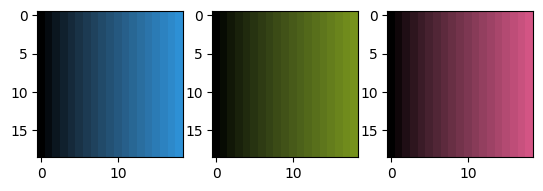

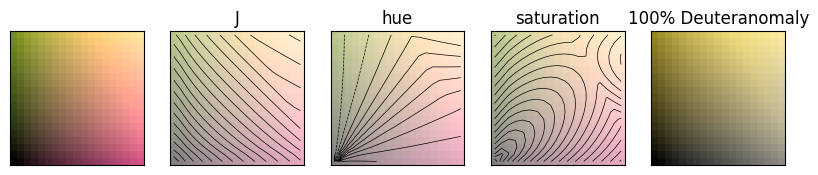

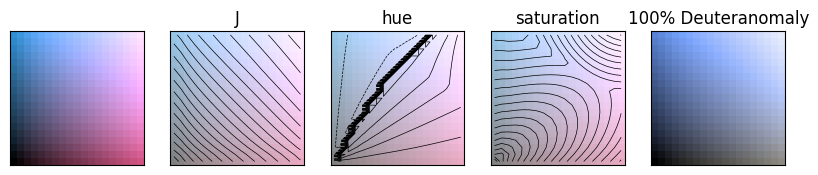

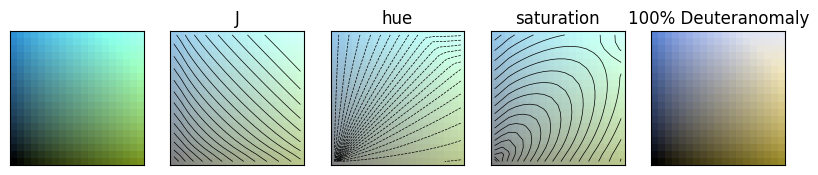

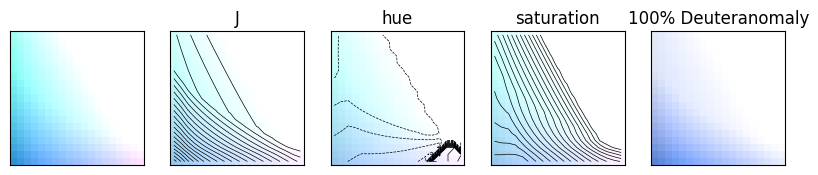

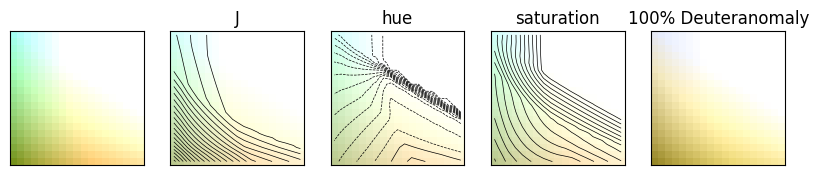

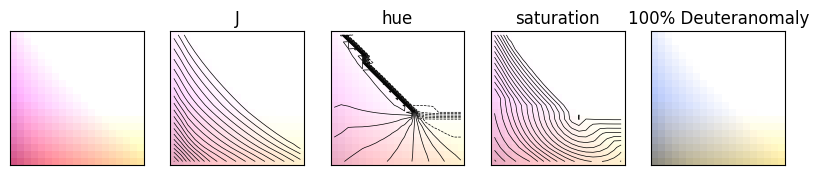

In [9]:
r = 30-180 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (1, 77) # range in lightness 
radius = 37
gamma = 0.8
sat_gamma = 0.65

cmap_0 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r, r = radius, gamma = gamma, sat_gamma = sat_gamma )
cmap_1 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+120, r = radius, gamma = gamma, sat_gamma = sat_gamma )
cmap_2 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+240, r = radius, gamma = gamma, sat_gamma = sat_gamma )

print(f'max before adjustment: {cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
# adjust greyscale by slightly shifting both colorbars

for i in range(N):
    factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3



# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
#end_c = cmap_0[0] + cmap_1[0] + cmap_2[0]
#cmap_0 = cmap_0/end_c[np.newaxis, :]
#cmap_1 = cmap_1/end_c[np.newaxis, :]
#cmap_2 = cmap_2/end_c[np.newaxis, :]

# ensure origin is rgb = (0,0,0)
cmap_0_b = cmap_0 - cmap_0[0,:] # copy with black 0,0,0
cmap_1_b = cmap_1 - cmap_1[0,:] # copy with black 0,0,0
cmap_2_b = cmap_2 - cmap_2[0,:] # copy with black 0,0,0
# non-linear mixing so that darker colors become more distinct
ls = np.linspace(0,1,N)[:, np.newaxis] ** 1 *np.ones((N,3))
# scorrectly scaled black and white
cmap_0 = cmap_0_b * (1-ls) + cmap_0 * (ls)
cmap_1 = cmap_1_b * (1-ls) + cmap_1 * (ls)
cmap_2 = cmap_2_b * (1-ls) + cmap_2 * (ls)

# combine to a 3d color matrix
cmap = cmap_0[:,np.newaxis,np.newaxis] + cmap_1[np.newaxis,:,np.newaxis] + cmap_2[np.newaxis,np.newaxis,:]

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[N-1,N-1]*N-1, cmap[0,0]*N-1)


# select cbars
colorbar_dict['3VarAddC0'] = cmap[:,0,0]
colorbar_dict['3VarAddC1'] = cmap[0,:,0]
colorbar_dict['3VarAddC2'] = cmap[0,0,:]

# evaluate
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0*np.ones((N,N,3)))
axes[1].imshow(cmap_1*np.ones((N,N,3)))
axes[2].imshow(cmap_2*np.ones((N,N,3)))

fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[0,:,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,0,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,:,0] + 1e-5, axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[-1,:,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,-1,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,:,-1] + 1e-5, axes) # include a delta (+1e-5) to avoid error

In [10]:
colorbar_dict['3VarAddC0'][0]

array([0., 0., 0.])

# Colorbars 3VarAddD

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

max before adjustment: [1.41028893 1.49909981 1.47073842]
values <0: 0
values >1: 5216


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


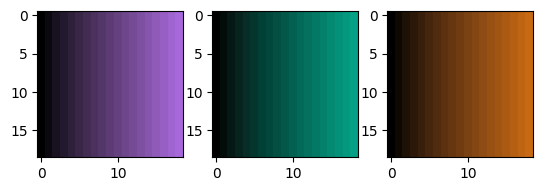

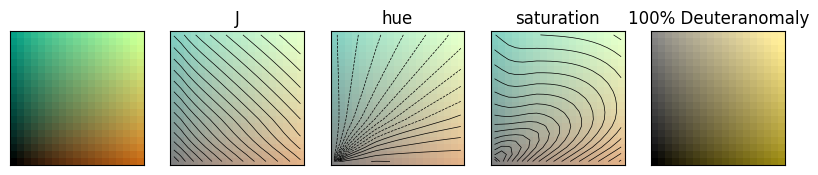

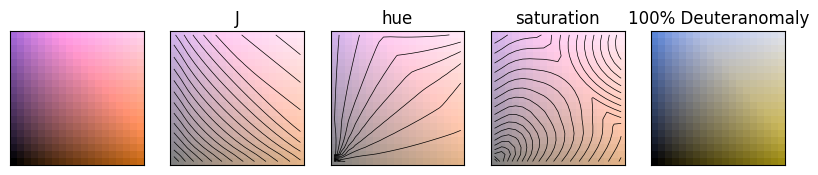

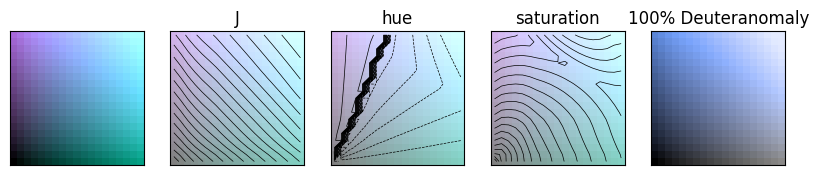

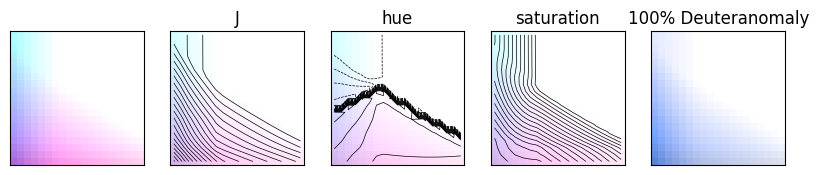

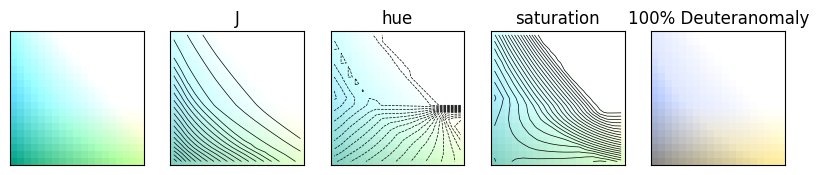

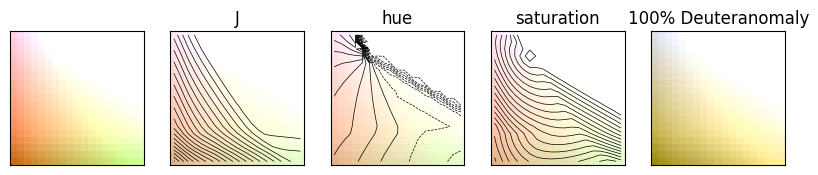

In [11]:
r = -30+180 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (1, 77) # range in lightness 
radius = 37
gamma = 0.8
sat_gamma = 0.65

cmap_0 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r, r = radius, gamma = gamma, sat_gamma = sat_gamma )
cmap_1 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+120, r = radius, gamma = gamma, sat_gamma = sat_gamma )
cmap_2 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+240, r = radius, gamma = gamma, sat_gamma = sat_gamma )

print(f'max before adjustment: {cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3



# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
#end_c = cmap_0[0] + cmap_1[0] + cmap_2[0]
#cmap_0 = cmap_0/end_c[np.newaxis, :]
#cmap_1 = cmap_1/end_c[np.newaxis, :]
#cmap_2 = cmap_2/end_c[np.newaxis, :]

# ensure origin is rgb = (0,0,0)
cmap_0_b = cmap_0 - cmap_0[0,:] # copy with black 0,0,0
cmap_1_b = cmap_1 - cmap_1[0,:] # copy with black 0,0,0
cmap_2_b = cmap_2 - cmap_2[0,:] # copy with black 0,0,0
# non-linear mixing so that darker colors become more distinct
ls = np.linspace(0,1,N)[:, np.newaxis] ** 1 *np.ones((N,3))
# scorrectly scaled black and white
cmap_0 = cmap_0_b * (1-ls) + cmap_0 * (ls)
cmap_1 = cmap_1_b * (1-ls) + cmap_1 * (ls)
cmap_2 = cmap_2_b * (1-ls) + cmap_2 * (ls)

# combine to a 3d color matrix
cmap = cmap_0[:,np.newaxis,np.newaxis] + cmap_1[np.newaxis,:,np.newaxis] + cmap_2[np.newaxis,np.newaxis,:]

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[N-1,N-1]*N-1, cmap[0,0]*N-1)


# select cbars
colorbar_dict['3VarAddD0'] = cmap[:,0,0]
colorbar_dict['3VarAddD1'] = cmap[0,:,0]
colorbar_dict['3VarAddD2'] = cmap[0,0,:]

# evaluate
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0*np.ones((N,N,3)))
axes[1].imshow(cmap_1*np.ones((N,N,3)))
axes[2].imshow(cmap_2*np.ones((N,N,3)))

fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[0,:,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,0,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,:,0] + 1e-5, axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[-1,:,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,-1,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,:,-1] + 1e-5, axes) # include a delta (+1e-5) to avoid error

In [12]:
colorbar_dict['3VarAddD0'][0]

array([0., 0., 0.])

# 3VarSubA

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

max before adjustment: [0.04392316 0.03489787 0.00559461]
min before adjustment: [0.98222334 0.92773347 0.91749709]
values <0: 37
values >1: 0
check for change in the first 3 values of the first: 
 [[1.         1.         1.        ]
 [0.97212399 0.98361276 0.99381614]
 [0.94287741 0.96774975 0.98978633]]
check for change in the first 3 values of the second:
 [[1.         1.         1.        ]
 [0.97537332 0.98436197 0.96654742]
 [0.95022175 0.96935873 0.93093592]]
check for change in the first 3 values of the second:
 [[1.         1.         1.        ]
 [0.99621341 0.97573599 0.98334716]
 [0.99460702 0.95059769 0.96698391]]


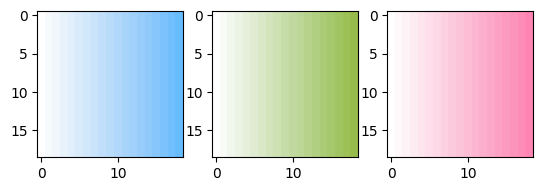

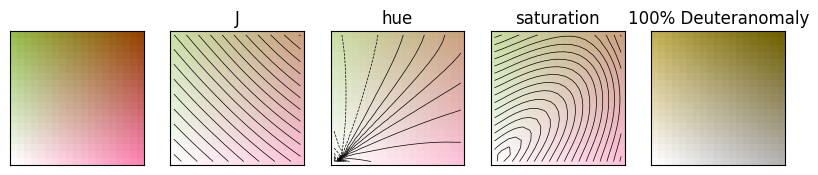

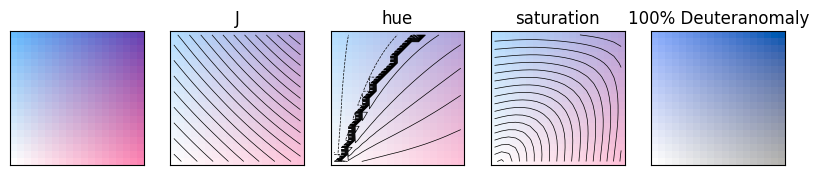

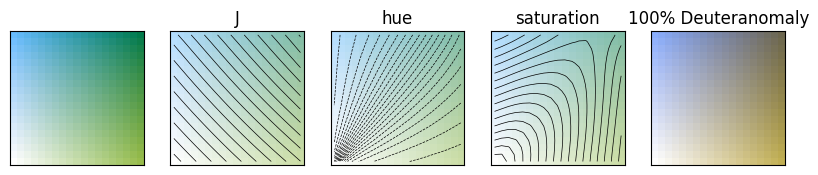

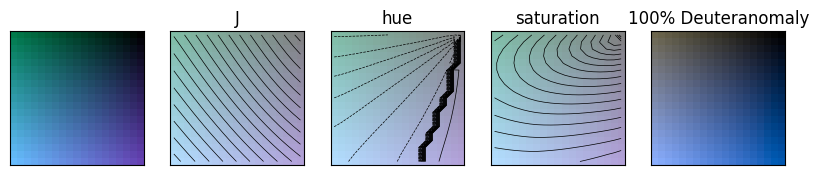

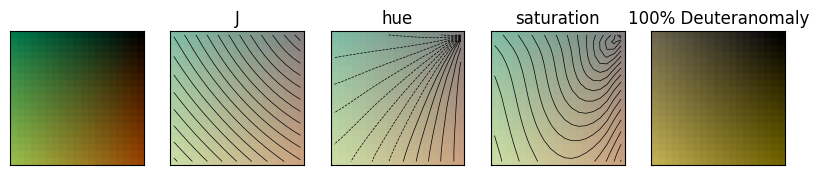

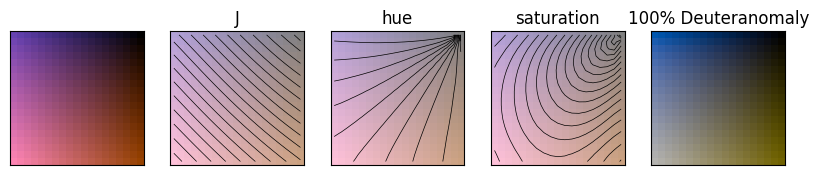

In [13]:
r = 30-180 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (128, 98.6) # range in lightness 
radius = 35
gamma = 1  

cmap_0 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r, r = radius, gamma = gamma)
cmap_1 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+120, r = radius, gamma = gamma)
cmap_2 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+240, r = radius, gamma = gamma)

print(f'max before adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
print(f'min before adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
#print(f'max after adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
#print(f'min after adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
# ensure the end (when combined) is rgb = (0,0,0), this will avoid problems later

end_c = 1 - (1 - cmap_0[-1]) - (1 - cmap_1[-1]) - (1 - cmap_2[-1])
cmap_0 = cmap_0 - end_c[np.newaxis, :]/3
cmap_1 = cmap_1 - end_c[np.newaxis, :]/3
cmap_1 = cmap_1 - end_c[np.newaxis, :]/3
# ensure origin is rgb = (1,1,1)
cmap_0_b = cmap_0 + (1 - cmap_0[0,:]) # copy with correct origin
cmap_1_b = cmap_1 + (1 - cmap_1[0,:]) # copy with correct origin
cmap_2_b = cmap_2 + (1 - cmap_2[0,:]) # copy with correct origin
# mixing so that darker colors become more distinct
ls = np.linspace(0,1,N)[:, np.newaxis] ** 1 *np.ones((N,3))
# scorrectly scaled black and white
cmap_0 = cmap_0_b * (1-ls) + cmap_0 * (ls)
cmap_1 = cmap_1_b * (1-ls) + cmap_1 * (ls)
cmap_2 = cmap_2_b * (1-ls) + cmap_2 * (ls)

# combine to a 2d color matrix
cmap = 1-(1-cmap_0[:,np.newaxis,np.newaxis]) \
        -(1-cmap_1[np.newaxis,:,np.newaxis]) \
        -(1-cmap_2[np.newaxis,np.newaxis,:])

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[N-1,N-1]*N-1, cmap[0,0]*N-1)


# select cbars
colorbar_dict['3VarSubA0'] = cmap[:,0,0]
colorbar_dict['3VarSubA1'] = cmap[0,:,0]
colorbar_dict['3VarSubA2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarSubA0'][0:3]))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubA1'][0:3]))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubA2'][0:3]))


# evaluate
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[:]*np.ones((N,N,3)))
axes[1].imshow(cmap_1[:]*np.ones((N,N,3)))
axes[2].imshow(cmap_2[:]*np.ones((N,N,3)))

fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[0,:,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,0,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,:,0] + 1e-5, axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[-1,:,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,-1,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,:,-1] + 1e-5, axes) # include a delta (+1e-5) to avoid error

In [14]:
colorbar_dict['3VarSubA0'][0]

array([1., 1., 1.])

# 3VarSubB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

max before adjustment: [-0.03132576  0.04552173  0.00526444]
min before adjustment: [0.98222334 0.92773347 0.91749709]
values <0: 41
values >1: 0
check for change in the first 3 values of the first: 
 [[1.         1.         1.        ]
 [0.97212399 0.98361276 0.99381614]
 [0.94287741 0.96774975 0.98978633]]
check for change in the first 3 values of the second:
 [[1.         1.         1.        ]
 [0.97537332 0.98436197 0.96654742]
 [0.95022175 0.96935873 0.93093592]]
check for change in the first 3 values of the second:
 [[1.         1.         1.        ]
 [0.99621341 0.97573599 0.98334716]
 [0.99460702 0.95059769 0.96698391]]


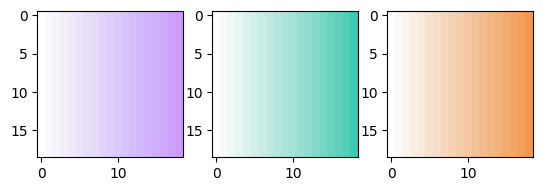

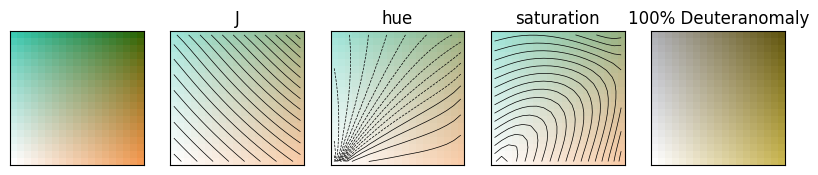

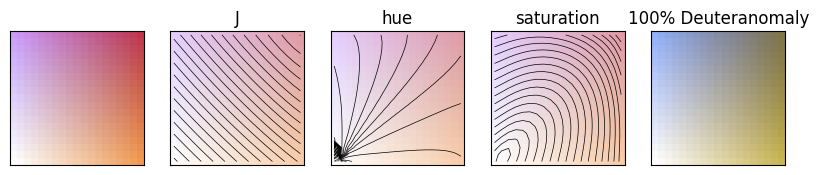

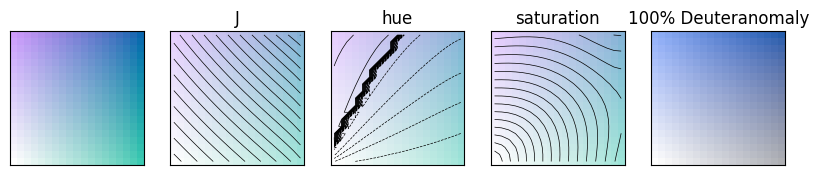

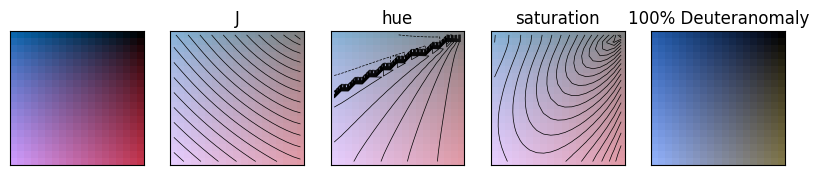

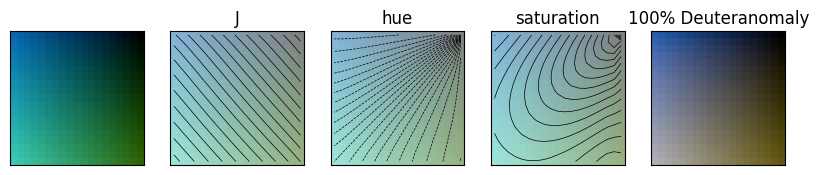

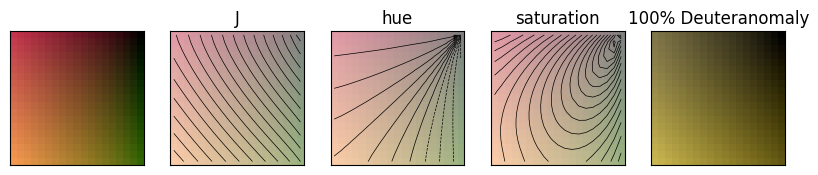

In [15]:
r = -30+180 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (128, 98.6) # range in lightness 
radius = 32
gamma = 1  

cmap_0 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r, r = radius, gamma = gamma)
cmap_1 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+120, r = radius, gamma = gamma)
cmap_2 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+240, r = radius, gamma = gamma)

print(f'max before adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
print(f'min before adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
#print(f'max after adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
#print(f'min after adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
# ensure the end (when combined) is rgb = (0,0,0), this will avoid problems later

end_c = 1 - (1 - cmap_0[-1]) - (1 - cmap_1[-1]) - (1 - cmap_2[-1])
cmap_0 = cmap_0 - end_c[np.newaxis, :]/3
cmap_1 = cmap_1 - end_c[np.newaxis, :]/3
cmap_1 = cmap_1 - end_c[np.newaxis, :]/3
# ensure origin is rgb = (1,1,1)
cmap_0_b = cmap_0 + (1 - cmap_0[0,:]) # copy with correct origin
cmap_1_b = cmap_1 + (1 - cmap_1[0,:]) # copy with correct origin
cmap_2_b = cmap_2 + (1 - cmap_2[0,:]) # copy with correct origin
# mixing so that darker colors become more distinct
ls = np.linspace(0,1,N)[:, np.newaxis] ** 1 *np.ones((N,3))
# scorrectly scaled black and white
cmap_0 = cmap_0_b * (1-ls) + cmap_0 * (ls)
cmap_1 = cmap_1_b * (1-ls) + cmap_1 * (ls)
cmap_2 = cmap_2_b * (1-ls) + cmap_2 * (ls)

# combine to a 2d color matrix
cmap = 1-(1-cmap_0[:,np.newaxis,np.newaxis]) \
        -(1-cmap_1[np.newaxis,:,np.newaxis]) \
        -(1-cmap_2[np.newaxis,np.newaxis,:])

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[N-1,N-1]*N-1, cmap[0,0]*N-1)


# select cbars
colorbar_dict['3VarSubB0'] = cmap[:,0,0]
colorbar_dict['3VarSubB1'] = cmap[0,:,0]
colorbar_dict['3VarSubB2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarSubA0'][0:3]))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubA1'][0:3]))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubA2'][0:3]))


# evaluate
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[:]*np.ones((N,N,3)))
axes[1].imshow(cmap_1[:]*np.ones((N,N,3)))
axes[2].imshow(cmap_2[:]*np.ones((N,N,3)))

fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[0,:,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,0,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,:,0] + 1e-5, axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[-1,:,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,-1,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,:,-1] + 1e-5, axes) # include a delta (+1e-5) to avoid error

# 3VarSubC

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

max before adjustment: [-0.54639372 -0.48629818 -0.50641318]
min before adjustment: [0.98222334 0.92773347 0.91749709]
values <0: 4593
values >1: 0
check for change in the first 3 values of the first: 
 [[1.         1.         1.        ]
 [0.97212399 0.98361276 0.99381614]
 [0.94287741 0.96774975 0.98978633]]
check for change in the first 3 values of the second:
 [[1.         1.         1.        ]
 [0.97537332 0.98436197 0.96654742]
 [0.95022175 0.96935873 0.93093592]]
check for change in the first 3 values of the second:
 [[1.         1.         1.        ]
 [0.99621341 0.97573599 0.98334716]
 [0.99460702 0.95059769 0.96698391]]


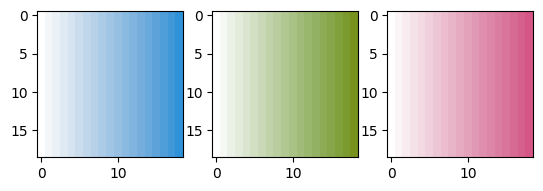

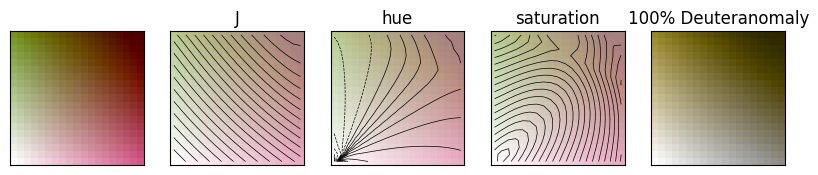

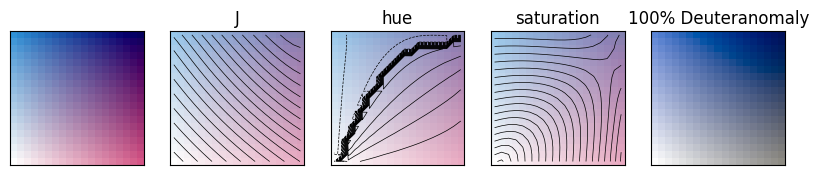

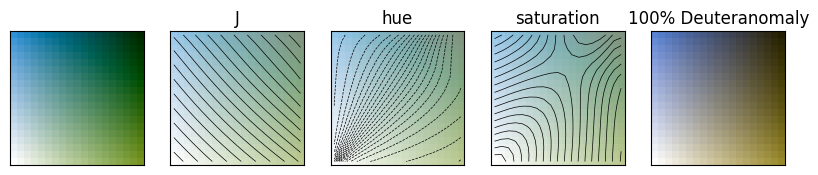

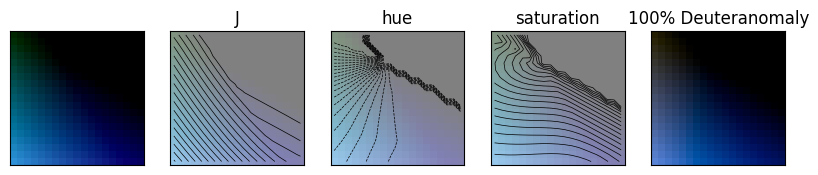

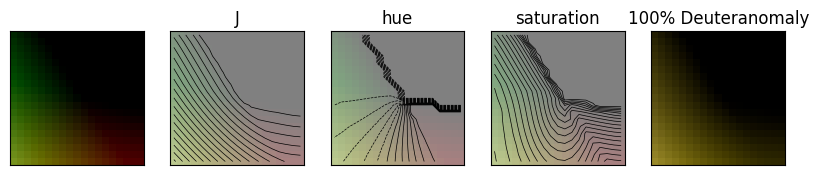

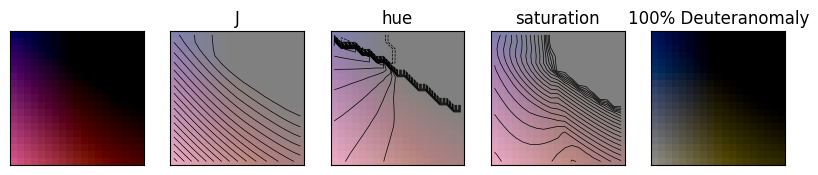

In [16]:
r = 30-180 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (128, 77.6) # range in lightness  
radius = 37
gamma = 1  

cmap_0 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r, r = radius, gamma = gamma)
cmap_1 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+120, r = radius, gamma = gamma)
cmap_2 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+240, r = radius, gamma = gamma)

print(f'max before adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
print(f'min before adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
#print(f'max after adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
#print(f'min after adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')

# ensure the end (when combined) is rgb = (0,0,0), this will avoid problems later
#end_c = 1 - (1 - cmap_0[0]) - (1 - cmap_1[0]) - (1 - cmap_2[0])
#cmap_0 = cmap_0 - end_c[np.newaxis, :]/3
#cmap_1 = cmap_1 - end_c[np.newaxis, :]/3
#cmap_1 = cmap_1 - end_c[np.newaxis, :]/3
# ensure origin is rgb = (1,1,1)
cmap_0_b = cmap_0 + (1 - cmap_0[0,:]) # copy with correct origin
cmap_1_b = cmap_1 + (1 - cmap_1[0,:]) # copy with correct origin
cmap_2_b = cmap_2 + (1 - cmap_2[0,:]) # copy with correct origin
# mixing so that darker colors become more distinct
ls = np.linspace(0,1,N)[:, np.newaxis] ** 1 *np.ones((N,3))
# scorrectly scaled black and white
cmap_0 = cmap_0_b * (1-ls) + cmap_0 * (ls)
cmap_1 = cmap_1_b * (1-ls) + cmap_1 * (ls)
cmap_2 = cmap_2_b * (1-ls) + cmap_2 * (ls)

# combine to a 2d color matrix
cmap = 1-(1-cmap_0[:,np.newaxis,np.newaxis]) \
        -(1-cmap_1[np.newaxis,:,np.newaxis]) \
        -(1-cmap_2[np.newaxis,np.newaxis,:])

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[N-1,N-1]*N-1, cmap[0,0]*N-1)


# select cbars
colorbar_dict['3VarSubC0'] = cmap[:,0,0]
colorbar_dict['3VarSubC1'] = cmap[0,:,0]
colorbar_dict['3VarSubC2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarSubA0'][0:3]))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubA1'][0:3]))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubA2'][0:3]))


# evaluate
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0*np.ones((N,N,3)))
axes[1].imshow(cmap_1*np.ones((N,N,3)))
axes[2].imshow(cmap_2*np.ones((N,N,3)))

fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[0,:,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,0,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,:,0] + 1e-5, axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[-1,:,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,-1,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,:,-1] + 1e-5, axes) # include a delta (+1e-5) to avoid error

# 3VarSubD

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

max before adjustment: [-0.64379893 -0.45445112 -0.4832043 ]
min before adjustment: [0.98222334 0.92773347 0.91749709]
values <0: 4429
values >1: 0
check for change in the first 3 values of the first: 
 [[1.         1.         1.        ]
 [0.97212399 0.98361276 0.99381614]
 [0.94287741 0.96774975 0.98978633]]
check for change in the first 3 values of the second:
 [[1.         1.         1.        ]
 [0.97537332 0.98436197 0.96654742]
 [0.95022175 0.96935873 0.93093592]]
check for change in the first 3 values of the second:
 [[1.         1.         1.        ]
 [0.99621341 0.97573599 0.98334716]
 [0.99460702 0.95059769 0.96698391]]


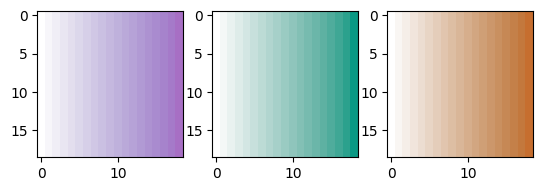

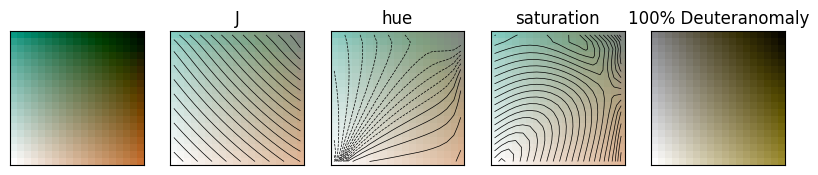

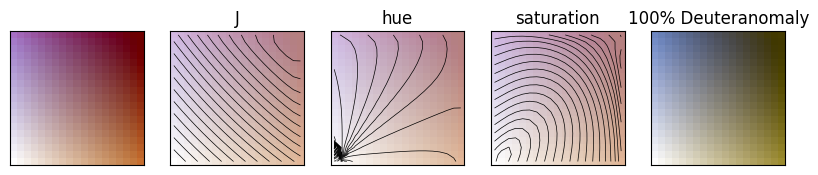

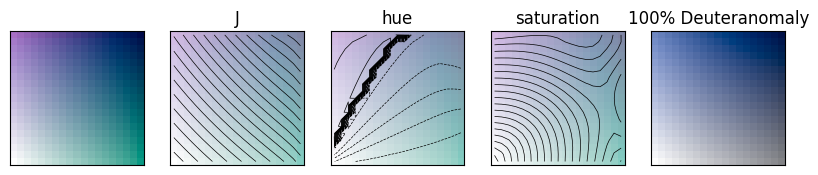

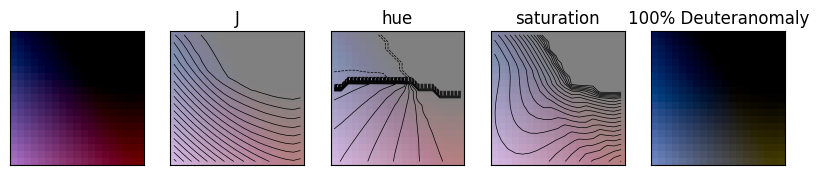

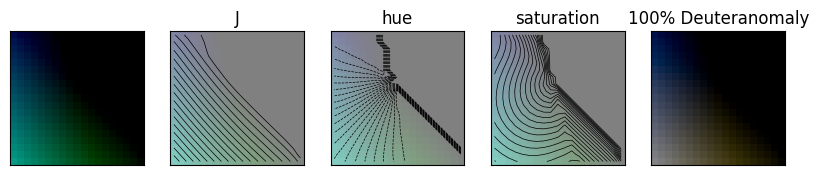

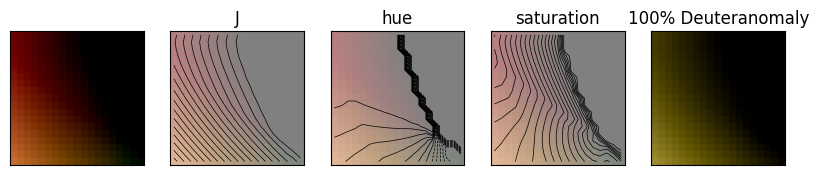

In [17]:
r = -30+180 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (128, 77.6) # range in lightness  
radius = 30
gamma = 1  

cmap_0 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r, r = radius, gamma = gamma)
cmap_1 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+120, r = radius, gamma = gamma)
cmap_2 = backend.get_colormap_from_CAM02(l = N, J = J, rot = r+240, r = radius, gamma = gamma)

print(f'max before adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
print(f'min before adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
#print(f'max after adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
#print(f'min after adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')

# ensure the end (when combined) is rgb = (0,0,0), this will avoid problems later
#end_c = 1 - (1 - cmap_0[0]) - (1 - cmap_1[0]) - (1 - cmap_2[0])
#cmap_0 = cmap_0 - end_c[np.newaxis, :]/3
#cmap_1 = cmap_1 - end_c[np.newaxis, :]/3
#cmap_1 = cmap_1 - end_c[np.newaxis, :]/3
# ensure origin is rgb = (1,1,1)
cmap_0_b = cmap_0 + (1 - cmap_0[0,:]) # copy with correct origin
cmap_1_b = cmap_1 + (1 - cmap_1[0,:]) # copy with correct origin
cmap_2_b = cmap_2 + (1 - cmap_2[0,:]) # copy with correct origin
# mixing so that darker colors become more distinct
ls = np.linspace(0,1,N)[:, np.newaxis] ** 1 *np.ones((N,3))
# scorrectly scaled black and white
cmap_0 = cmap_0_b * (1-ls) + cmap_0 * (ls)
cmap_1 = cmap_1_b * (1-ls) + cmap_1 * (ls)
cmap_2 = cmap_2_b * (1-ls) + cmap_2 * (ls)

# combine to a 2d color matrix
cmap = 1-(1-cmap_0[:,np.newaxis,np.newaxis]) \
        -(1-cmap_1[np.newaxis,:,np.newaxis]) \
        -(1-cmap_2[np.newaxis,np.newaxis,:])

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[N-1,N-1]*N-1, cmap[0,0]*N-1)


# select cbars
colorbar_dict['3VarSubD0'] = cmap[:,0,0]
colorbar_dict['3VarSubD1'] = cmap[0,:,0]
colorbar_dict['3VarSubD2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarSubA0'][0:3]))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubA1'][0:3]))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubA2'][0:3]))


# evaluate
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0*np.ones((N,N,3)))
axes[1].imshow(cmap_1*np.ones((N,N,3)))
axes[2].imshow(cmap_2*np.ones((N,N,3)))

fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[0,:,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,0,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,:,0] + 1e-5, axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[-1,:,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,-1,:] + 1e-5, axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
backend.eval(cmap[:,:,-1] + 1e-5, axes) # include a delta (+1e-5) to avoid error

In [18]:
import pickle
with open(r"3vars.pickle", "wb") as output_file:
    pickle.dump(colorbar_dict, output_file)